# Brain Hemmorahage Detection

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization,MaxPool2D
from keras import models,optimizers
from keras.preprocessing.image import load_img,img_to_array

### Setting Directory for train,test and val data

In [4]:
train_directory=r'E:\CSE\5th sem\project\archive\Train_aug'
test_directory=r'E:\CSE\5th sem\project\archive\Test'
val_directory=r'E:\CSE\5th sem\project\archive\Val'

In [5]:
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)

In [6]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                  target_size=(130,130),
                                                  class_mode='binary',
                                                  batch_size=32)

val_generator=val_datagen.flow_from_directory(val_directory,
                                             target_size=(130,130),
                                             class_mode='binary')

Found 2885 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


# Model

In [7]:
model=models.Sequential()
model.add(Conv2D(256,(1,1),input_shape=(130,130,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(1,1),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(1,1),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(1,1),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(Dense(32,activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(Dense(1,activation='sigmoid',kernel_regularizer='l2'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 130, 130, 256)     1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 65, 65, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 65, 65, 256)       65792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       65792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 256)      

In [58]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [71]:
history=model.fit_generator(train_generator,steps_per_epoch=91,epochs=2,
                           validation_data=val_generator,validation_steps=1,shuffle=True)

Epoch 1/2
91/91 [==============================] - 105s 1s/step - loss: 0.4840 - accuracy: 0.9289 - val_loss: 0.6573 - val_accuracy: 0.9062
Epoch 2/2
91/91 [==============================] - 99s 1s/step - loss: 0.4043 - accuracy: 0.9421 - val_loss: 0.5705 - val_accuracy: 0.8846


In [93]:
model.save('final.h5')

### Accuracy on test Data

In [62]:
test_generator=val_datagen.flow_from_directory(test_directory,target_size=(130,130),class_mode='binary')

Found 28 images belonging to 2 classes.


In [72]:
model.evaluate_generator(test_generator)

[0.5339677929878235, 0.9285714030265808]

# Prediction

### Positive Cases

In [29]:
model=keras.models.load_model('final.h5',compile=False)

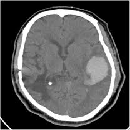

In [30]:
img=load_img(r'E:\CSE\5th sem\project\archive\hem.jpg',target_size=(130,130))
img

In [33]:
img=load_img('hem.jpg',target_size=(130,130))
img=img_to_array(img)
img=np.expand_dims(img,[0])
img=img/255
model.predict(img)

array([[0.736074]], dtype=float32)

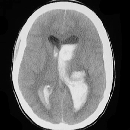

In [38]:
img=load_img('blood.jpg',target_size=(130,130))
img

In [39]:
img=img_to_array(img)
img=np.expand_dims(img,[0])
img=img/255
model.predict(img)

array([[0.9940069]], dtype=float32)

### Negative Cases

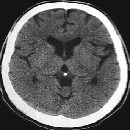

In [42]:
img=load_img('abc.png',target_size=(130,130))
img

In [43]:
img=img_to_array(img)
img=np.expand_dims(img,[0])
img=img/255
model.predict(img)

array([[0.28658158]], dtype=float32)

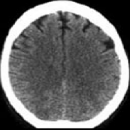

In [44]:
img=load_img('norm1.png',target_size=(130,130))
img

In [45]:
img=img_to_array(img)
img=np.expand_dims(img,[0])
img=img/255
model.predict(img)

array([[0.02099581]], dtype=float32)